## ライブラリのインポート

In [1]:
import numpy as np
import matplotlib.pyplot as plt

自作ライブラリのインポート

In [2]:
from main import MiddleLayer, OutputLayer, sigmoid, sigmoid_dash, softmax, error_dash

## データの作成

In [3]:
i_range = np.arange(-1.0, 1.1, 0.1)
j_range = np.arange(-1.0, 1.1, 0.1)

X = np.array([[i, j] for i in  i_range for j in j_range])
Y = np.array([[0, 1] if j < np.sin(np.pi * i) else [1, 0] for i in i_range for j in j_range])

sin_data = np.sin(np.pi * X)

描画用関数

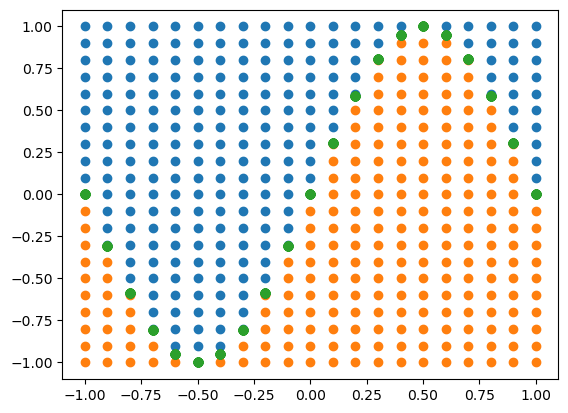

In [4]:
def plot(Y_dash=None):
    
    A = [[], []]
    B = [[], []]

    for (a, b), P in zip(X, Y if Y_dash is None else Y_dash):
        idx = P.argmax()
        A[idx].append(a)
        B[idx].append(b)

    plt.scatter(A[0], B[0])
    plt.scatter(A[1], B[1])
    plt.scatter(X, sin_data)
    plt.show()

plot()

## デモ

layer を作成

In [5]:
Layers = []

Layers.append(MiddleLayer(2, 6, activation_func=sigmoid, activation_func_dash=sigmoid_dash))
Layers.append(OutputLayer(6, 2, activation_func=softmax, error_func_dash=error_dash))

重みとバイアスの確認

In [6]:
Layers[0].W, Layers[0].b

(array([[ 6.46807232e-03,  4.79782586e-03, -1.89799477e-02,
         -8.06716529e-03, -8.30594040e-03,  1.23565049e-03],
        [ 6.30750796e-03, -5.27155890e-05, -7.57961431e-03,
          1.18570525e-02,  4.26235144e-03, -1.39757775e-02]]),
 array([ 0.00413741, -0.01472169, -0.00342749,  0.00489037, -0.00530498,
         0.01027599]))

順伝播(=無学習の状態で予測)

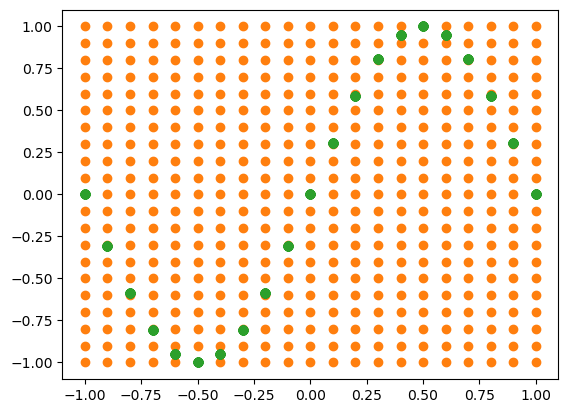

In [7]:
Y1 = Layers[0].forward(X)
Y_dash = Layers[1].forward(Y1)

plot(Y_dash)

逆伝播(=初めての学習)

In [8]:
dY1 = Layers[1].backward(Y)
_ = Layers[0].backward(dY1)

順伝播(2回目)

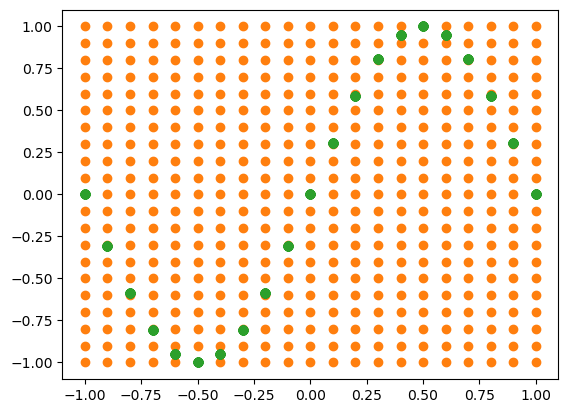

In [9]:
Y1 = Layers[0].forward(X)
Y_dash = Layers[1].forward(Y1)

plot(Y_dash)

重みとバイアスが更新されたことを確認

In [10]:
Layers[0].W, Layers[0].b

(array([[ 0.06256571,  0.02907199, -0.00523465, -0.0079212 , -0.03021227,
         -0.01464544],
        [-0.04909797, -0.02402756, -0.0211551 ,  0.01171289,  0.0258986 ,
          0.00170919]]),
 array([ 0.00431308, -0.01464479, -0.00338473,  0.00489084, -0.00537286,
         0.01022747]))

## 学習

layer の作成

In [11]:
Layers = []

Layers.append(MiddleLayer(2, 6, activation_func=sigmoid, activation_func_dash=sigmoid_dash))
Layers.append(OutputLayer(6, 2, activation_func=softmax, error_func_dash=error_dash))

設定

In [12]:
epoch = 101
batch = 10
n_data = len(X)
interval = 10

エポックごとに学習

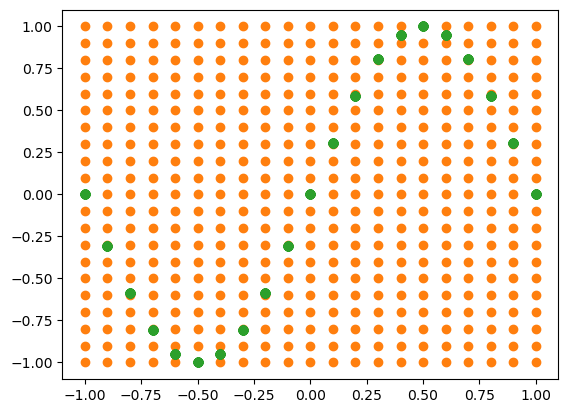

Epoch: 0/101 Error: 0.6929542024842058


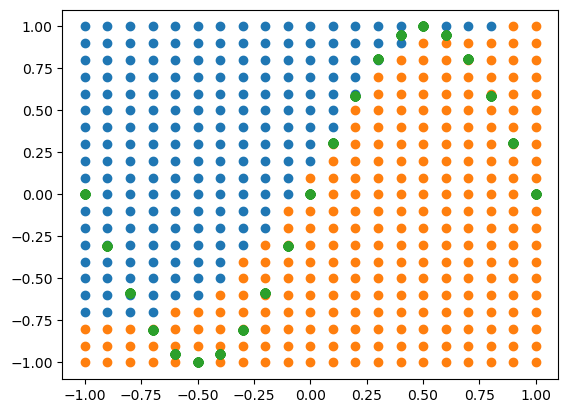

Epoch: 10/101 Error: 0.30525195966037577


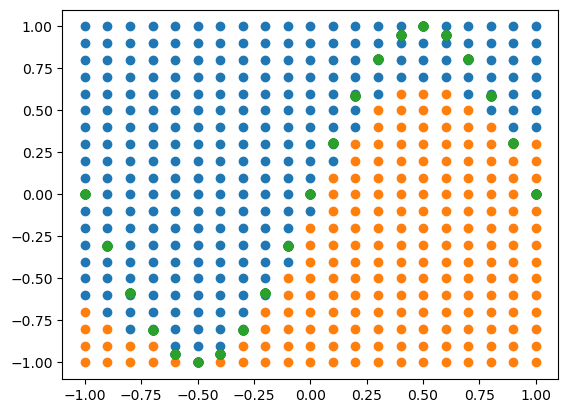

Epoch: 20/101 Error: 0.22132533557371487


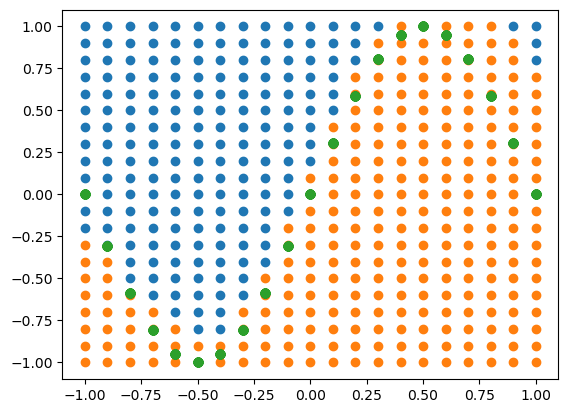

Epoch: 30/101 Error: 0.19359022184106378


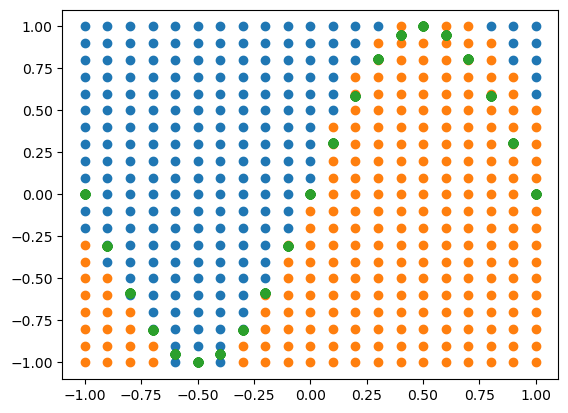

Epoch: 40/101 Error: 0.1403213260997254


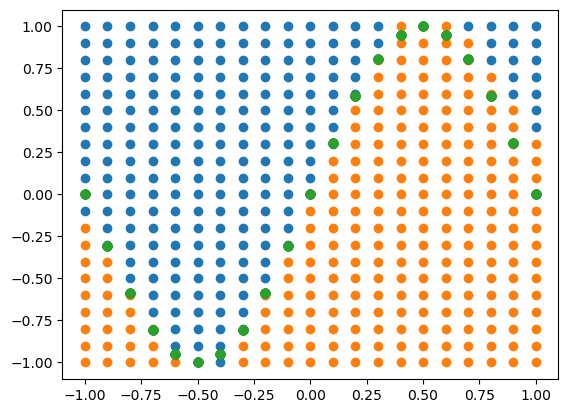

Epoch: 50/101 Error: 0.08860353849268561


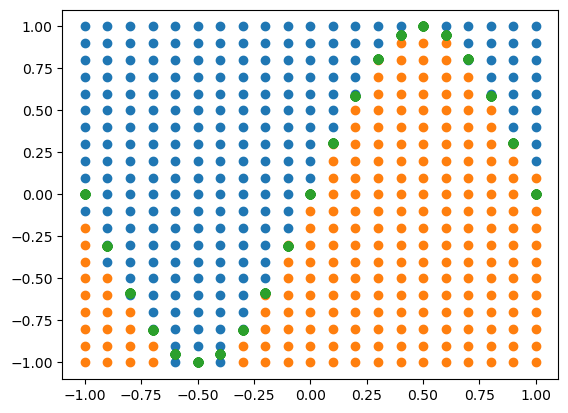

Epoch: 60/101 Error: 0.07203378127120681


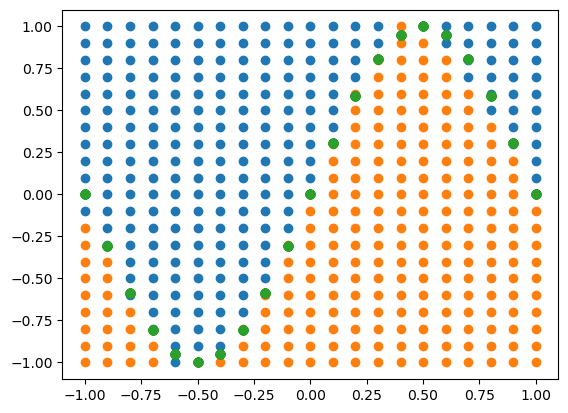

Epoch: 70/101 Error: 0.08004766198691607


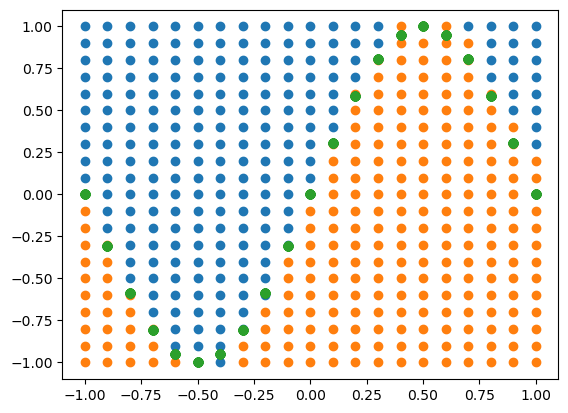

Epoch: 80/101 Error: 0.0651293275595669


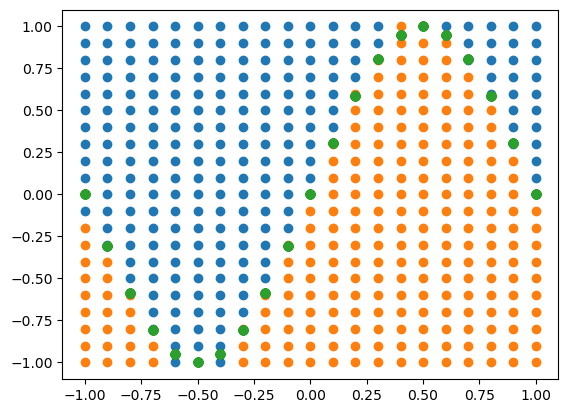

Epoch: 90/101 Error: 0.06302756680693536


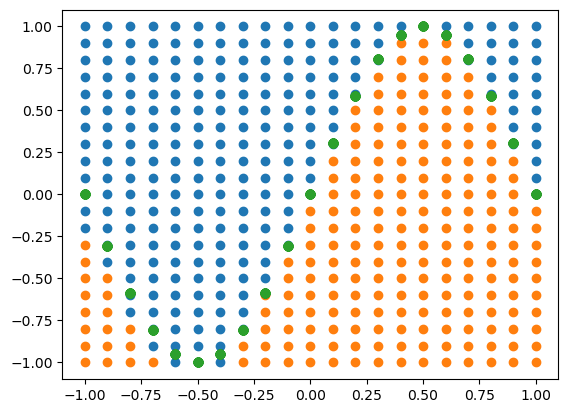

Epoch: 100/101 Error: 0.07439379909185871


In [13]:
for i in range(epoch):
    index_random = np.arange(n_data)
    np.random.shuffle(index_random)

    for j in range(0, n_data, batch):
        idx = index_random[j: j + batch]

        tX, tY = X[idx], Y[idx]

        for layer in Layers:
            tX = layer.forward(tX)

        for layer in Layers[::-1]:
            tY = layer.backward(tY)
    
    if i % interval == 0:
        Y_dash = X[::]

        for layer in Layers:
            Y_dash = layer.forward(Y_dash)

        total_error = -np.sum(Y * np.log(Y_dash + 1e-7))

        plot(Y_dash)
        print(f"Epoch: {i}/{epoch}", f"Error: {total_error / n_data}")

## 本

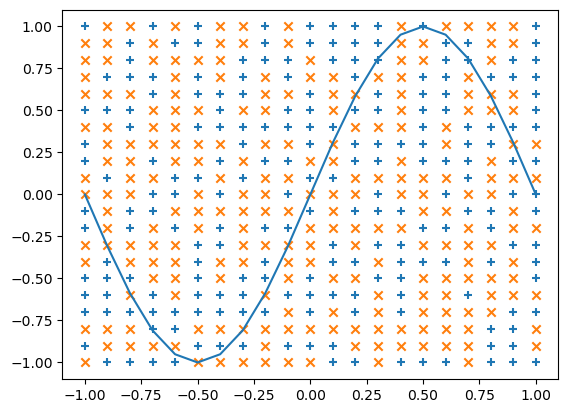

Epoch:0/101 Error:0.7194283742266055


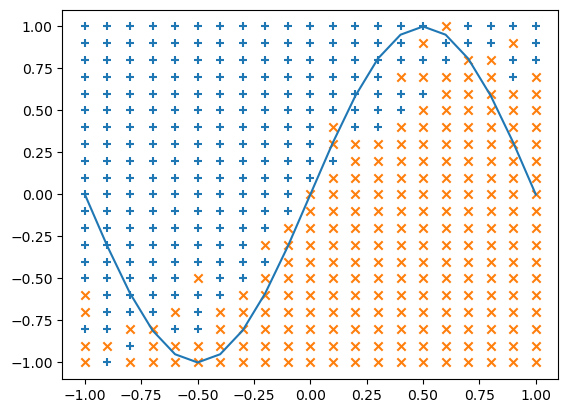

Epoch:10/101 Error:0.3166421624372261


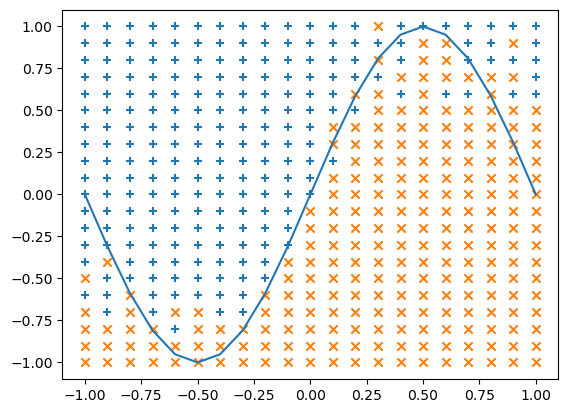

Epoch:20/101 Error:0.2225086262267922


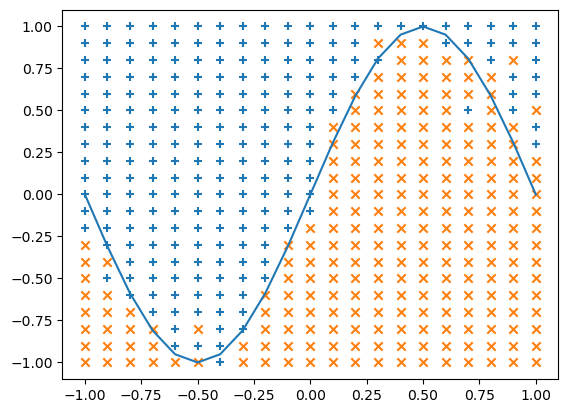

Epoch:30/101 Error:0.16644061496694462


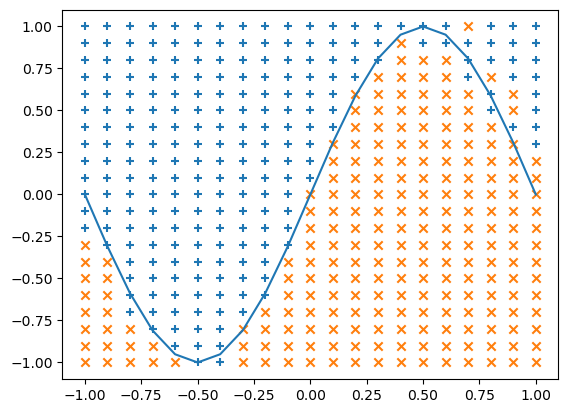

Epoch:40/101 Error:0.13550096618858973


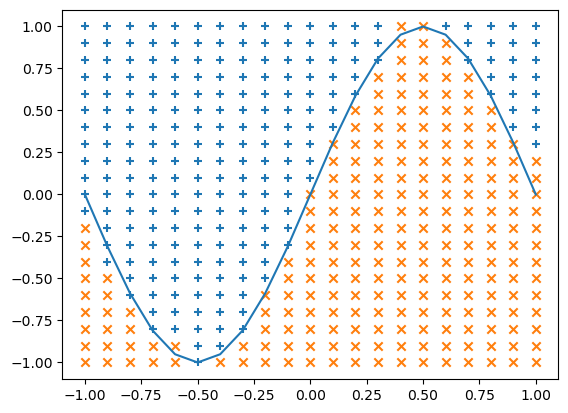

Epoch:50/101 Error:0.09512063505961854


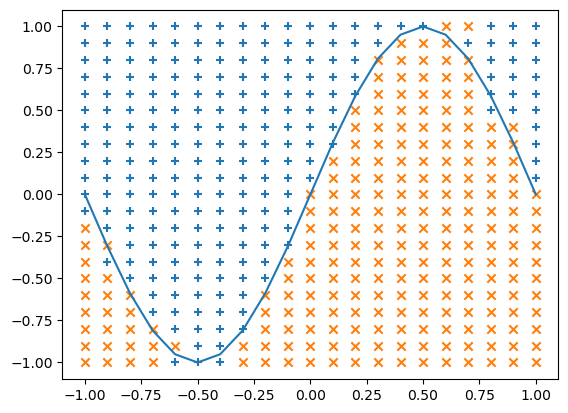

Epoch:60/101 Error:0.08298552687924321


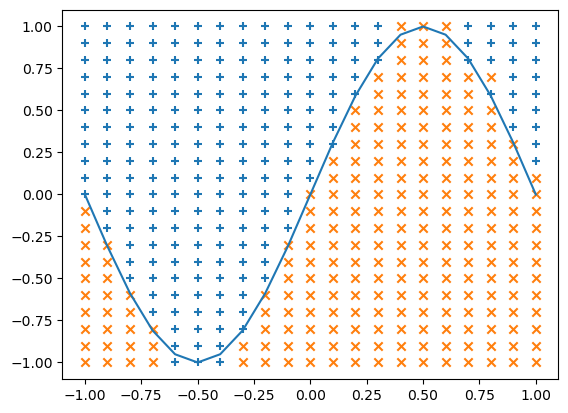

Epoch:70/101 Error:0.08687891238529367


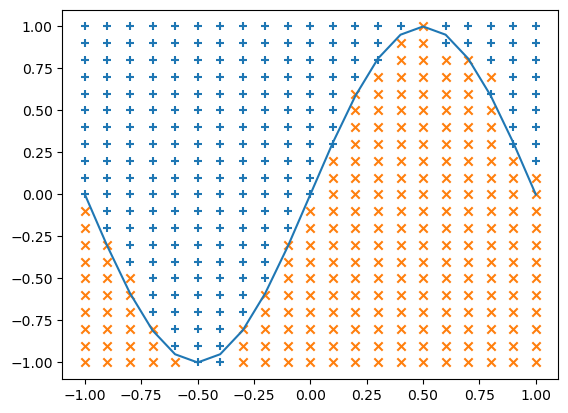

Epoch:80/101 Error:0.07479128610969792


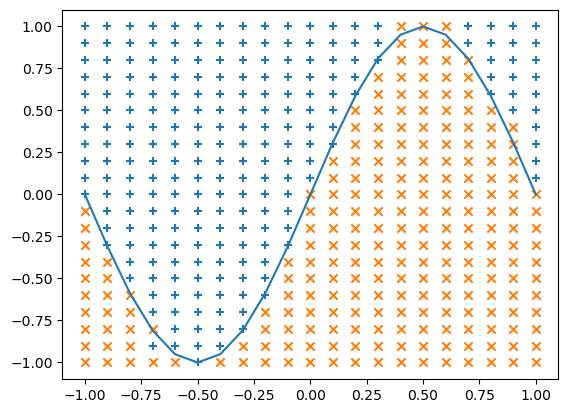

Epoch:90/101 Error:0.06632573976967221


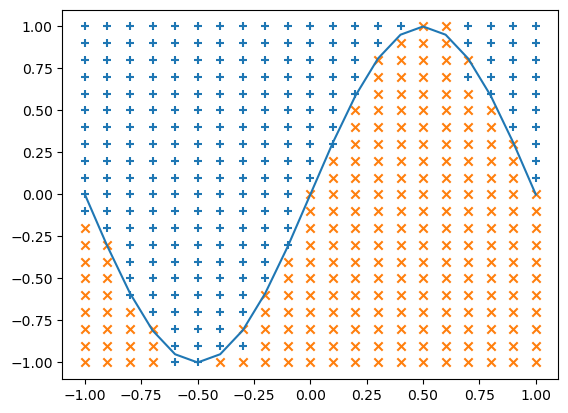

Epoch:100/101 Error:0.06557203827396901


In [14]:
X = np.arange(-1.0, 1.1, 0.1)
Y = np.arange(-1.0, 1.1, 0.1)

input_data = []
correct_data = []

for x in X:
    for y in Y:
        input_data.append([x, y])
        if y < np.sin(np.pi * x):
            correct_data.append([0, 1])
        else:
            correct_data.append([1, 0])

n_data = len(correct_data)

input_data = np.array(input_data)
correct_data = np.array(correct_data)

n_in = 2
n_mid = 6
n_out = 2

epoch = 101
interval = 10

Layers = []

Layers.append(MiddleLayer(2, 6, activation_func=sigmoid, activation_func_dash=sigmoid_dash))
Layers.append(OutputLayer(6, 2, activation_func=softmax, error_func_dash=error_dash))

sin_data = np.sin(np.pi * X)

for i in range(epoch):
    index_random = np.arange(n_data)
    np.random.shuffle(index_random)

    total_error = 0
    x_1 = []
    y_1 = []
    x_2 = []
    y_2 = []

    for idx in index_random:

        x = input_data[idx]
        t = correct_data[idx]

        X_ = x.reshape(1, 2)

        for layer in Layers:
            X_ = layer.forward(X_)
        
        T = t.reshape(1, 2)

        for layer in Layers[::-1]:
            T = layer.backward(T)

        if i % interval == 0:
            y = Layers[-1].Y.reshape(-1)
            total_error += -np.sum(t * np.log(y + 1e-7))

            if y[0] > y[1]:
                x_1.append(x[0])
                y_1.append(x[1])
            else:
                x_2.append(x[0])
                y_2.append(x[1])
                
    if i % interval == 0:
        plt.plot(X, sin_data)
        plt.scatter(x_1, y_1, marker="+")
        plt.scatter(x_2, y_2, marker="x")
        plt.show()
        print("Epoch:" + str(i) + "/" + str(epoch), "Error:" + str(total_error/n_data))